In [1]:
import matplotlib.pyplot as plt
import numpy as np
print(np.__version__)
import torch 
import torch.nn as nn

import pandas as pd
# Retina mode
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

2.2.4


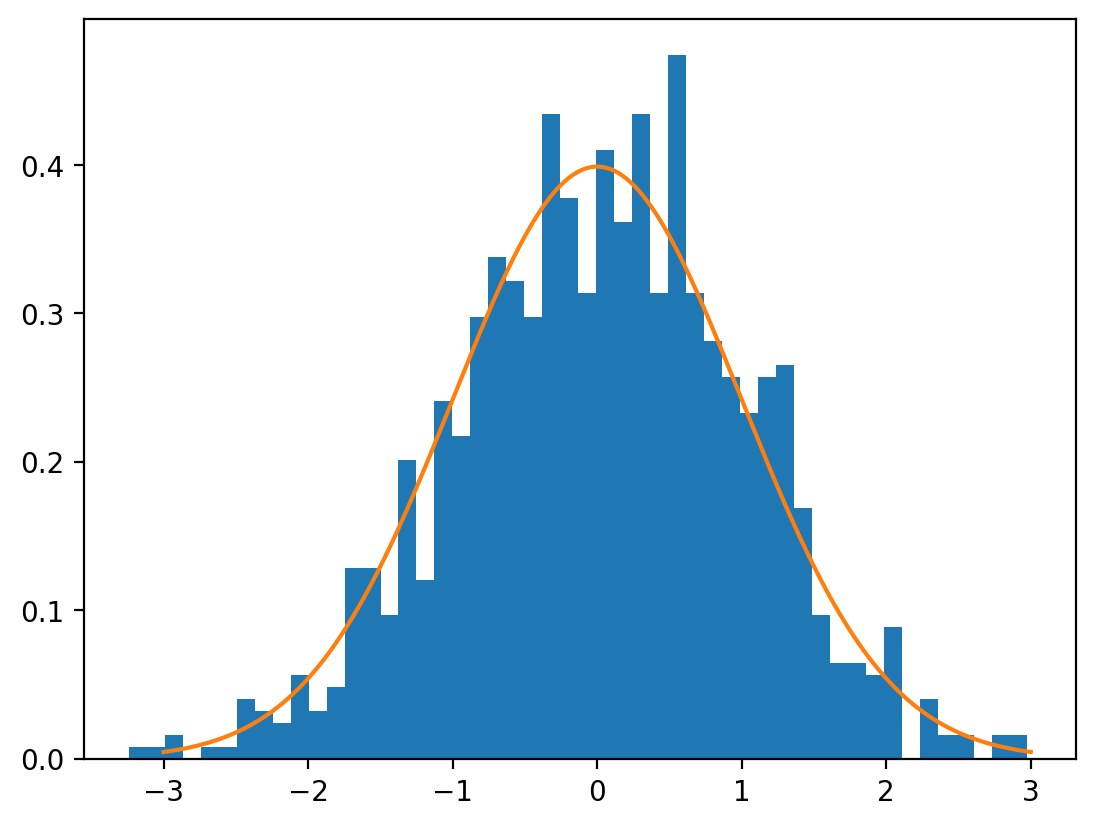

In [2]:
dist = torch.distributions.Normal(0, 1)
x = dist.sample((1000,))
plt.hist(x.numpy(), bins=50, density=True)

x_range = torch.linspace(-3, 3, 1000)
y = dist.log_prob(x_range).exp()
plt.plot(x_range.numpy(), y.numpy())

In [4]:
dist.sample([10])

tensor([ 1.0756e+00,  2.0577e+00, -1.0163e-03,  9.5015e-01,  8.4053e-01,
         8.8550e-01,  2.3585e-01,  4.1851e-01, -1.2278e-01,  5.0092e-01])

In [5]:
dist_2d_normal = torch.distributions.MultivariateNormal(torch.tensor([0.0, 0.0]), torch.eye(2))
dist_2d_normal.sample([10])

tensor([[ 0.1240, -0.3458],
        [-2.4494, -0.4942],
        [ 1.5626,  0.8712],
        [-0.8091,  0.9062],
        [-2.1580,  0.1052],
        [ 0.3418, -0.1646],
        [ 0.7106,  0.1230],
        [ 1.6572,  0.0317],
        [-0.5882, -1.8741],
        [ 1.2747, -0.7089]])

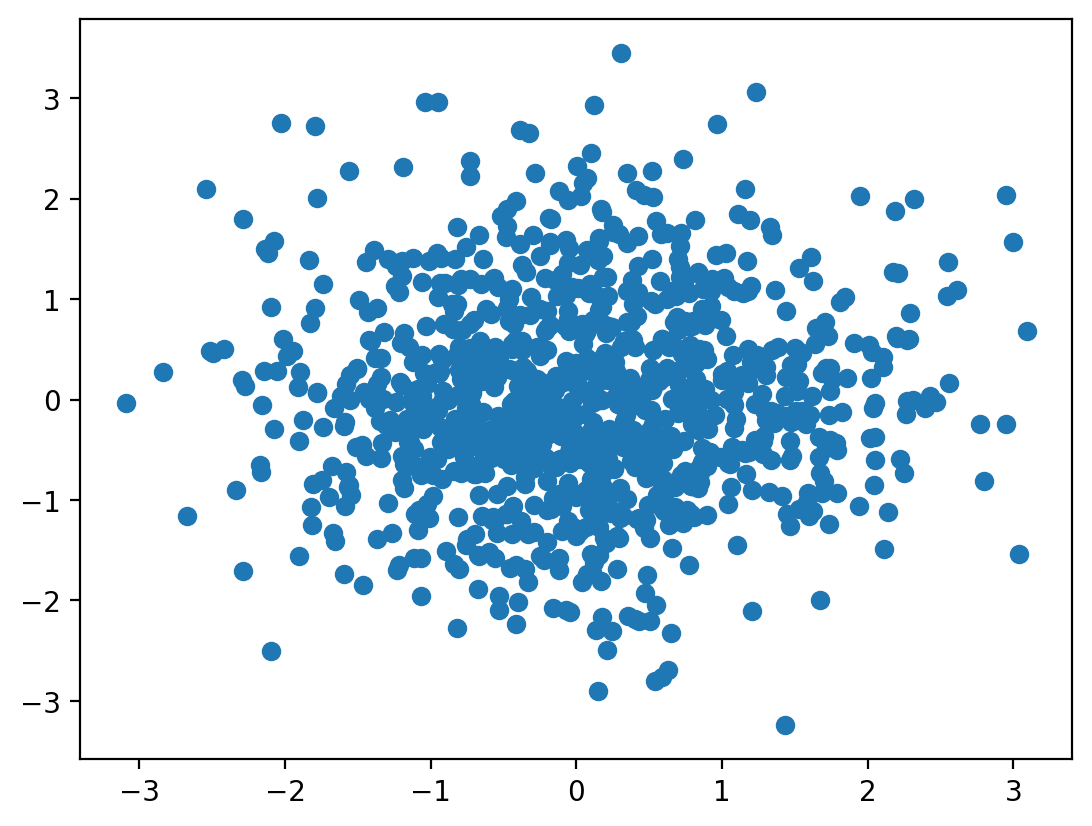

In [11]:
plt.scatter(*dist_2d_normal.sample([1000]).numpy().T)

Text(0.5, 0, 'PDF')

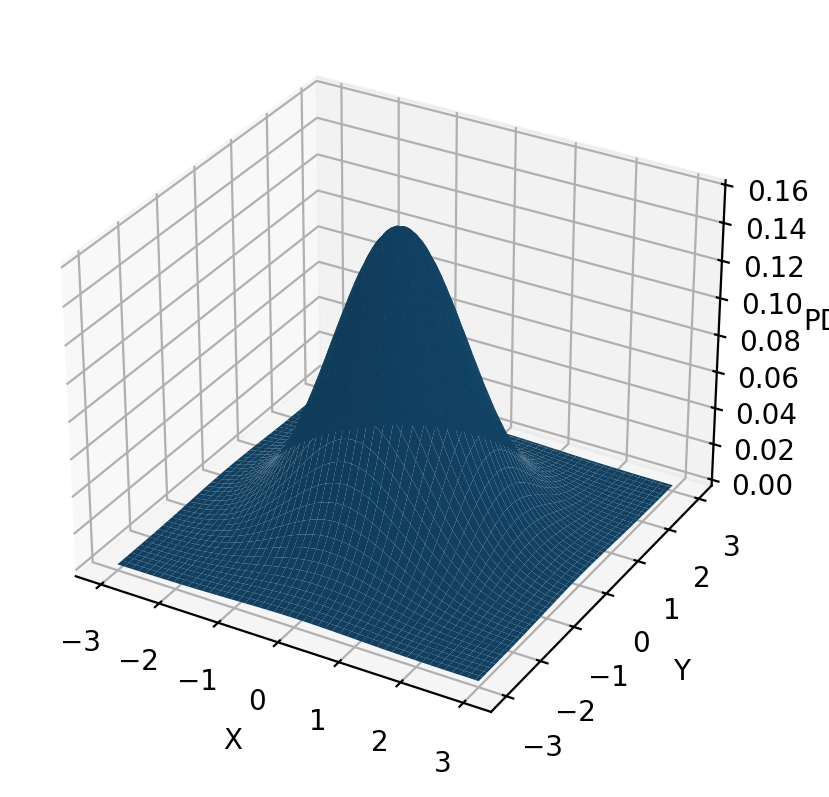

In [7]:
# Plot 2D normal distribution surface plot of PDF
from mpl_toolkits.mplot3d import Axes3D

x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100)

X, Y = torch.meshgrid(x, y)
xy = torch.stack([X, Y], 2)
z = dist_2d_normal.log_prob(xy).exp()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), z.numpy())

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')

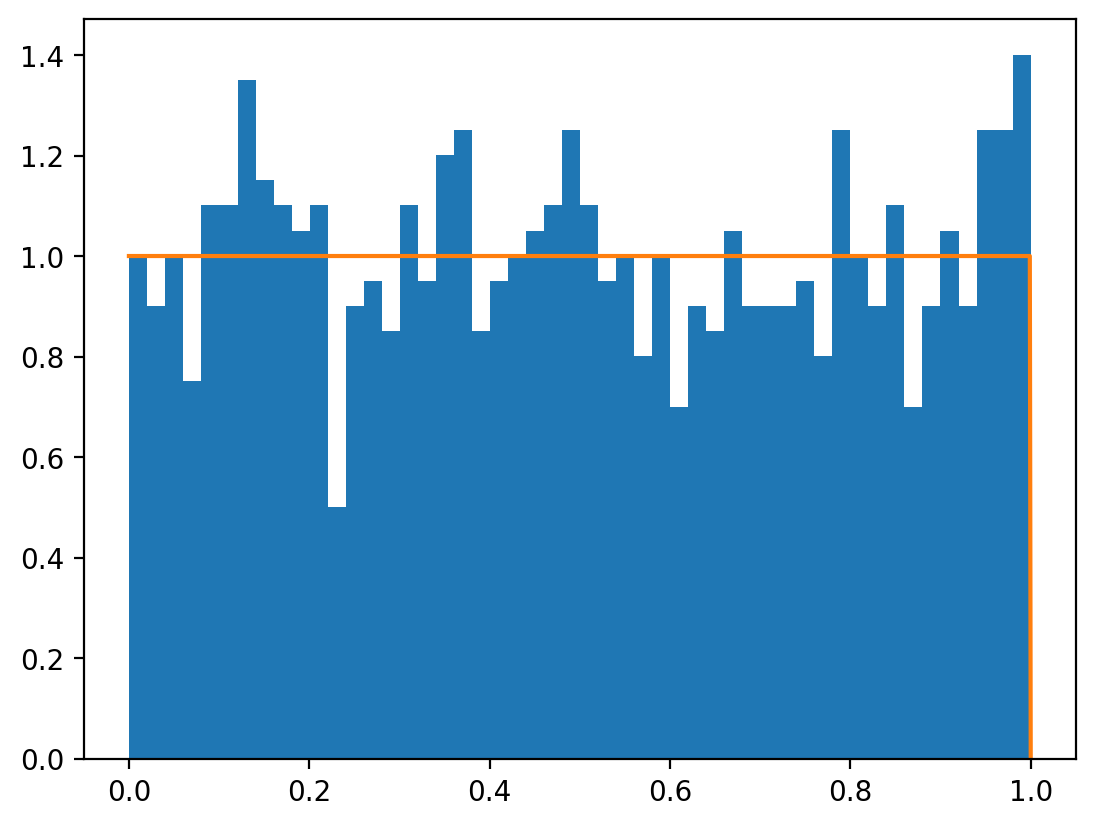

In [8]:
# uniform distribution
dist_uniform = torch.distributions.Uniform(0, 1)
x = dist_uniform.sample((1000,))
plt.hist(x.numpy(), bins=50, density=True)

x_range = torch.linspace(0, 1, 1000)
y = dist_uniform.log_prob(x_range).exp()
plt.plot(x_range.numpy(), y.numpy())


In [9]:
dist_uniform_2d = torch.distributions.Uniform(torch.tensor([0.0, 0.0]), torch.tensor([1.0, 1.0]))
dist_uniform_2d.sample([10])

tensor([[0.8225, 0.8799],
        [0.6463, 0.6322],
        [0.7820, 0.7046],
        [0.0475, 0.0779],
        [0.3177, 0.0613],
        [0.4928, 0.0676],
        [0.3475, 0.1610],
        [0.1352, 0.2825],
        [0.8844, 0.6881],
        [0.5253, 0.3034]])

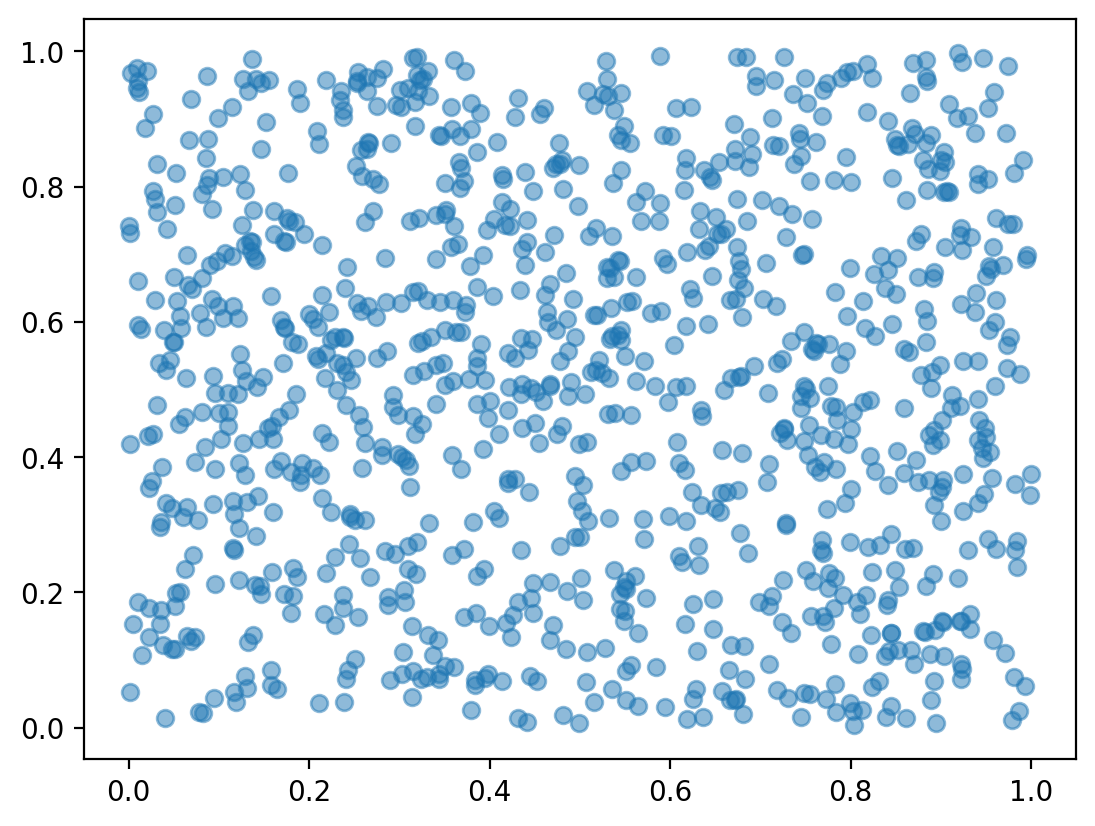

In [10]:
plt.scatter(*dist_uniform_2d.sample([1000]).numpy().T, alpha=0.5)

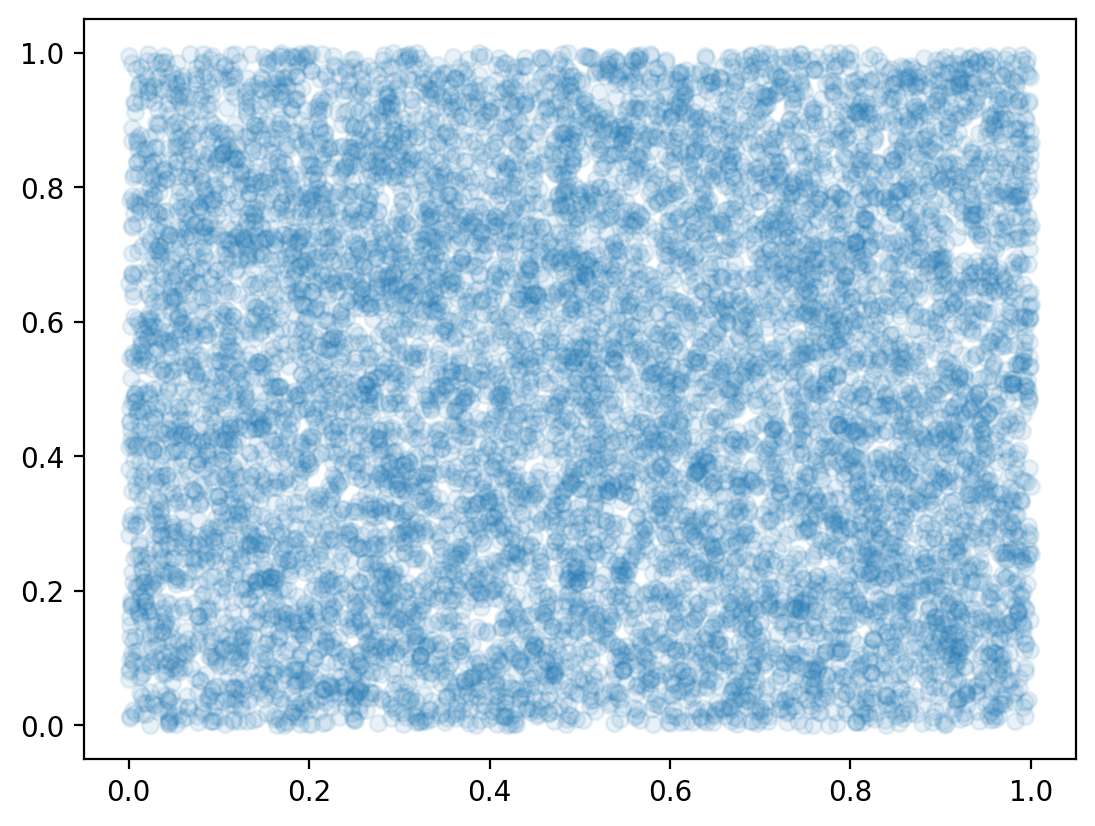

In [12]:
plt.scatter(*dist_uniform_2d.sample([10000]).numpy().T, alpha=0.1)

Text(0.5, 0, 'PDF')

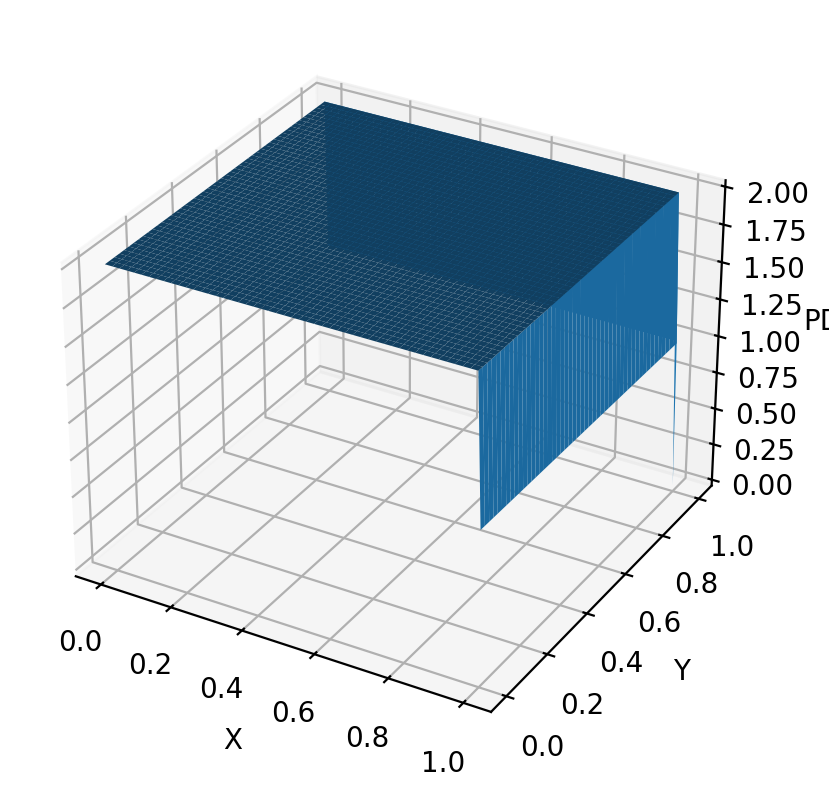

In [21]:
# surface plot of PDF
x = torch.linspace(0, 1, 100)
y = torch.linspace(0, 1, 100)

X, Y = torch.meshgrid(x, y)
xy = torch.stack([X, Y], 2)
z = dist_uniform_2d.log_prob(xy).exp().sum(-1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X.numpy(), Y.numpy(), z.numpy())
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('PDF')